## Simulation of the Brownian motion

In [302]:
# Import
import numpy as np
import matplotlib.pyplot as plt

### I- Forward simulation

#### (a) - Justification (Voir le pdf associé)

#### (b) - Draw a sample of 1000 copies of the discretized Brownian motion 

In [303]:
N = 1000 # number of itterations 
T = 1
def brownian_T(n): # retourne un vecteur de N simulations de W_T, et une simulation d'un brownien W
    delta_T = T/(2**(n))
    W_T = np.zeros((N,2**(n)+1)) # vector of differents simulations of  Brownian motion at T = 1, W_T
    #W_T_2 = [] # vector of differents simulations of Brownian motion at T/2 = 0.5 
    Z = np.random.randn(N,2**n)*np.sqrt(delta_T) # tirage independants de loi normal sur [0,1]
   # W = [0] ## pour tracer la première marche du premier brownien simulé brownien

    # calcul et stockage de N simulation de brownien à l'instant T = 1
    mid = 2**(n-1)
    for i in range(N):
        W_1 = 0
        for j in range(1, 2**(n) + 1):
            W_1 += Z[i][j-1]
            W_T[i][j] = W_1

    return W_T


In [317]:
W = brownian_T(9)

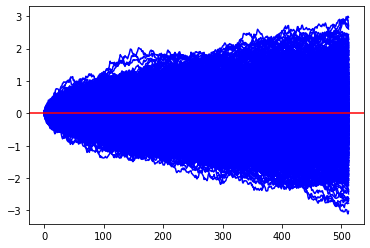

In [318]:
# le tracer

for i in range(N):
    plt.plot(W[i], color = 'b', label = 'Brownian motion')
plt.axhline(0, color="r", label="Esperance")
plt.show()

### Pour une seule simulation du brownien

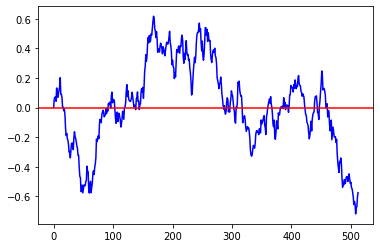

In [319]:
plt.plot(W[0], color = 'b', label = 'Brownian motion')
plt.axhline(0, color="r", label="Esperance")
plt.show()

#### (c) - Compute sample mean , variance of W_T and cov(W_T, W_T/2)

In [320]:
nb_test = 13

# liste de nb_test W_T

W = [brownian_T(k) for k in range(1, nb_test)] 

# mean
M = [np.mean(W[i-1][:,2**i]) for i in range(1,nb_test)]   # liste de moyenne pour différente valeurs de n

# variance
Var = [np.var(W[i-1][:,2**i]) for i in range(1,nb_test)] # liste de variance pour différente valeurs de n

# covariance

Cov = [np.mean(np.multiply(W[i-1][:,2**i], W[i-1][:,2**(i-1)])) for i in range(1, nb_test)] # liste de covariance de cov(W_T, W_T/2) pour différente valeurs de n



In [321]:
print("Mean", M, "\n")

print("Variance: ", Var, "\n")

print("Covariance", Cov,"\n")

Mean [-0.010989761892885678, 0.06309834071621372, -0.04035663913802068, -0.04446267986750157, 0.010708883341641282, -0.013409226470164, 0.020909926179597457, -0.020050560811058434, -0.01084726432697189, -0.0017371937333856807, 0.015147949792328511, -0.05623051708073719] 

Variance:  [0.9662532732726179, 1.0165167699821989, 1.002880275719841, 0.9092062445043972, 1.0195268415271828, 1.0428535021295477, 1.031188983317274, 1.0325662198133978, 0.9997859437041633, 0.9422009335722348, 1.0160661492567515, 0.96468169375375] 

Covariance [0.49081547120172514, 0.5079538212294892, 0.5207191421145405, 0.44927490276915016, 0.5009903035949553, 0.5744326804050224, 0.5419885277234897, 0.5290244266300982, 0.5224877162041139, 0.4688302246881709, 0.487216617780391, 0.5170464479256172] 



>>> On constate que lorsque n devient grand (quand ont tend vers un temps continue) la moyenne se rapproche de 0, la variance de 1, et la covariance de 0.5, ce qui est le résultat attendu.

### II- Backward simulation

#### (a), (b) voir le pdf associé.

#### (c) - Use the last property to simulate backward the discretized Brownianmotion

In [340]:
N = 1000

W_T = np.random.normal(0,1, N)# N simulation de N(0,1)
def rec(deb, fin, W, index):
    if (fin-deb)//2 > 0:
        W[index][deb + (fin-deb)//2] = np.random.randn()*np.sqrt((fin-deb)/4) + (W[index][deb] + W[index][fin])/2
        rec(deb, deb + (fin-deb)//2, W, index)
        rec(deb + (fin-deb)//2, fin, W, index)
def backward(n):
    W = np.zeros((N, 2**n + 1))
    W[:,2**n] = W_T # initialisation 
    for i in range(N):
        rec(0, 2**n, W, i)
    return W


In [341]:
W = backward(9)

### une simulation du brownien

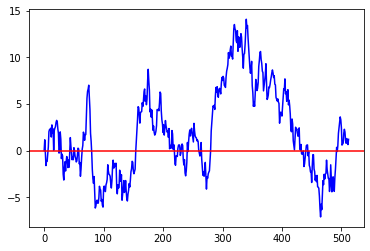

In [337]:
# le tracer

plt.plot(W[1], color = 'b', label = 'Brownian motion')
plt.axhline(0, color="r", label="Esperance")
plt.show()

#### (c) - Compute sample mean , variance of W_T and cov(W_T, W_T/2)

In [342]:
nb_test = 13

# liste de nb_test W_T

W = [backward(k) for k in range(1, nb_test)] 

# mean
M = [np.mean(W[i-1][:,2**i]) for i in range(1,nb_test)]   # liste de moyenne pour différente valeurs de n

# variance
Var = [np.var(W[i-1][:,2**i]) for i in range(1,nb_test)] # liste de variance pour différente valeurs de n

# covariance

Cov = [np.mean(np.multiply(W[i-1][:,2**i], W[i-1][:,2**(i-1)])) for i in range(1, nb_test)] # liste de covariance de cov(W_T, W_T/2) pour différente valeurs de n



In [343]:
print("Mean", M, "\n")

print("Variance: ", Var, "\n")

print("Covariance", Cov,"\n")

Mean [0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721, 0.01754990619077721] 

Variance:  [1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037, 1.020767127702037] 

Covariance [0.5498240085348407, 0.5470354355617255, 0.5179264107357802, 0.41805508021199855, 0.4378265164368219, 0.6338326610270298, 0.2908510842788122, 1.2143567032704268, 0.4974797433385382, 0.4099265203348698, -0.3612848709647003, 1.411639069216945] 



>>> On constate que lorsque n devient grand (quand ont tend vers un temps continue) la moyenne se rapproche de 0, la variance de 1, et la covariance de 0.5, ce qui est le résultat attendu.